<a href="https://www.kaggle.com/code/bhavinmoriya/sample-to-represent-population?scriptVersionId=111589802" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

A popular saying, we often hear is : "We often want population, but scarcity of it, we end up with just a sample. However, we often believe that sample is the population". Whatsoever we believe, at the end we want the result as if the sample was representing the population. For example,

1. There is an election and we want to know, whether Candidate A or B is going to win. Of course, asking each and every person is not feasible. Hence we take various samples and see samples inferences and try to make sense out of it, and with what probability it make sense, which is technically called confidence interval. We shall try to do it now. Instead of win, we shall try to predict the population age.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import norm, gamma, uniform, beta, binom, geom, expon, poisson

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Text(0.5, 1.0, 'Average Age 28')

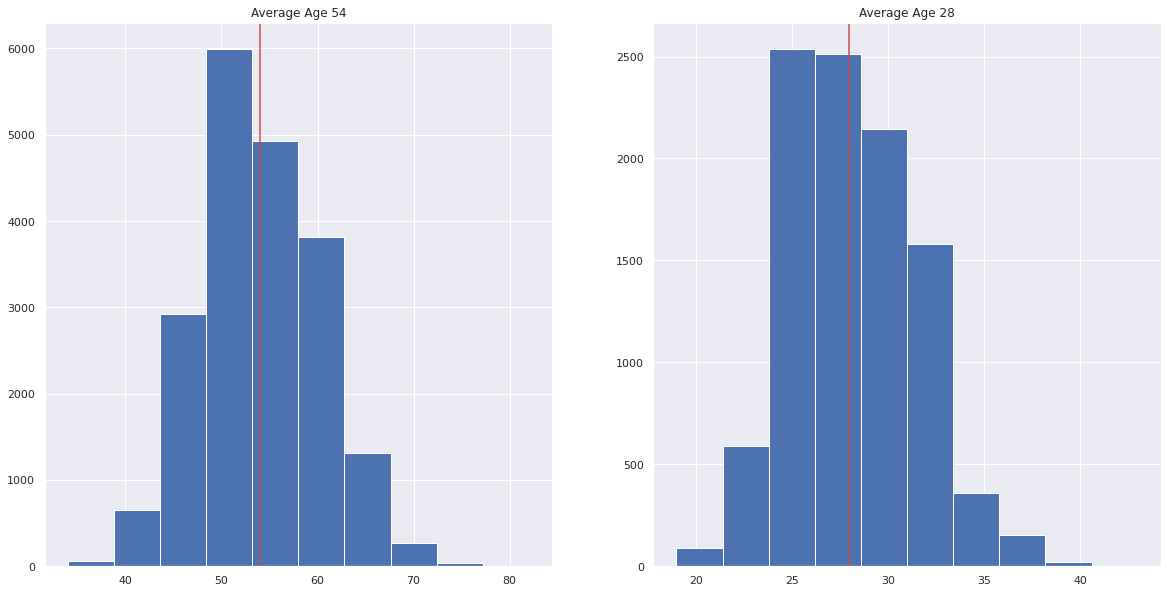

In [2]:
pop1 = poisson.rvs(loc=18, mu=36, size=20000) # 18 <= age with mean 36
pop2 = poisson.rvs(loc=18, mu=10, size=10000)
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax = ax.flatten()
ax[0].hist(pop1, label='Mean 54');
ax[0].axvline(54, c='r')
ax[0].set_title('Average Age 54')
ax[1].hist(pop2, label='Mean 28');
ax[1].axvline(28, c='r')
ax[1].set_title('Average Age 28')
# pop1

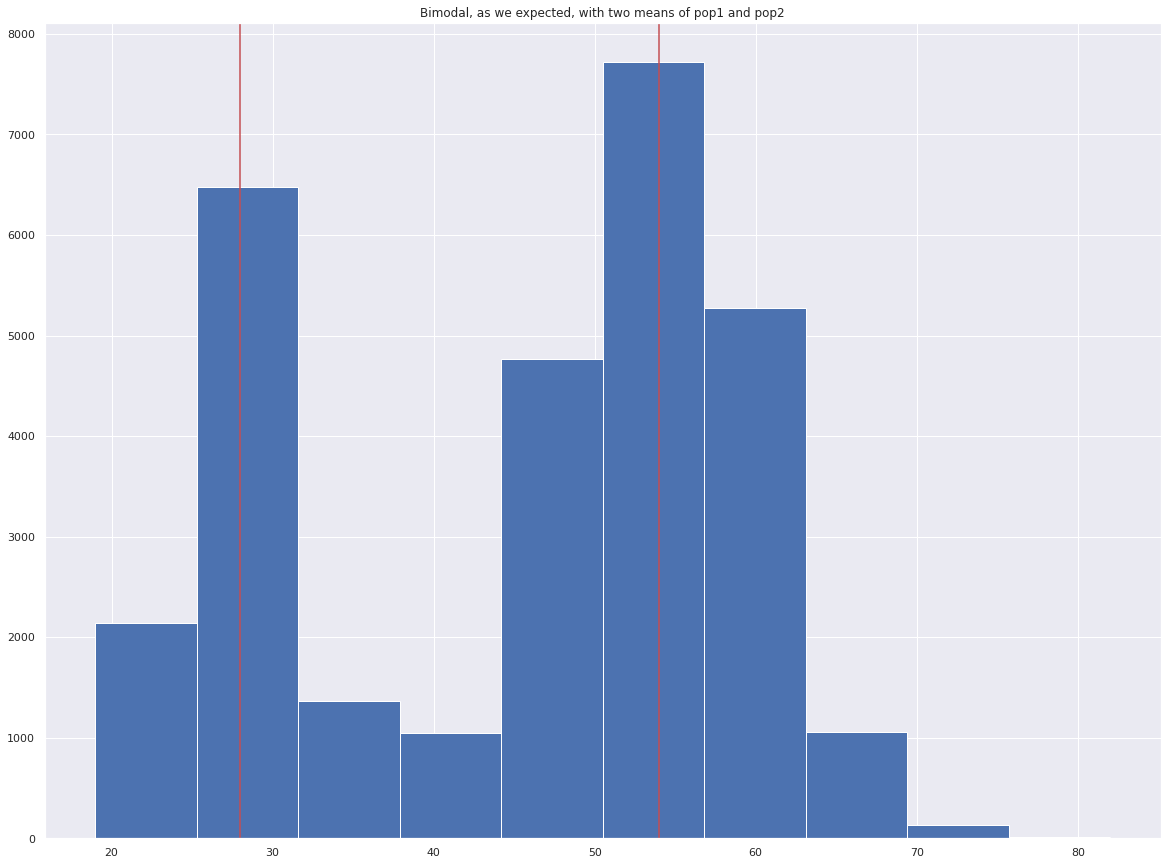

In [3]:
pop = np.concatenate((pop1, pop2))
plt.figure(figsize=(20,15))
plt.axvline(28, c='r')
plt.axvline(54, c='r')

plt.hist(pop);
plt.title("Bimodal, as we expected, with two means of pop1 and pop2");

Sample of size 3000 has mean : 45.54966666666667

Difference between sample mean and population mean is 0.22496666666666698




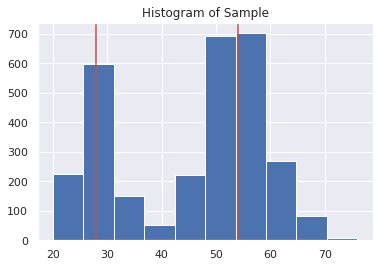

In [4]:
sample = np.random.choice(a=pop, size=3000)
sample_mean, pop_mean = sample.mean(), pop.mean()

plt.hist(sample)
plt.title('Histogram of Sample')
plt.axvline(28, c='r')
plt.axvline(54, c='r')

print(f'Sample of size 3000 has mean : {sample_mean}\n\nDifference between sample mean and population mean is \
{np.abs(sample_mean- pop_mean)}\n\n') 

So Sample seem to represent the population. Well, we expect the distribution in real life to be normal, which is often not the case. The reason want our data to be normal, is the normal distribution is quite nice, in a sense that it is symmetric and comes with many techniques, hence we could gather more info. To transform the any data to normal distribution is done using **CENTRAL LIMIT THEOREM.** It tell the following,

"Sampling Distribution of any given distribution is normal (i.e,
1. Take sample from given distribution. Calculate some statistic of sample(eg. mean, std, mode etc)
2. Repeat 1. many times, what we get it called sampling distribution
3. This distribution is going to be normal.

Let's see it in action.

Text(0.5, 1.0, 'Sampling Distribution')

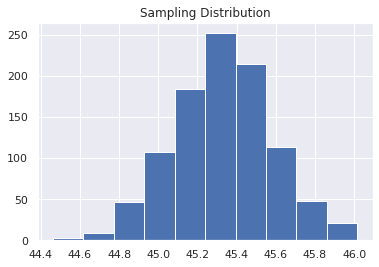

In [5]:
# as we have seen pop is bimodal
sample_dist_size = 1000
sample_dist = np.zeros(sample_dist_size)
for i in range(sample_dist_size):
    sample_dist[i] = (np.random.choice(a=pop, size=3000)).mean()
    
plt.hist(sample_dist);
plt.title('Sampling Distribution')

In [6]:
print(f'Now we are better approximating the mean of the population age.\n\
The difference is : {pop_mean - sample_dist.mean()}')

Now we are better approximating the mean of the population age.
The difference is : -0.0034283333333320343


# CONFIDENCE INTERVALS

Population was difficult to get data from. So we chose sample, which was not sufficient, hence we chose many samples and did sample statistics. Taking many samples could be infeasible. How to solve it?
There comes **CONFIDENCE INTERVALS**. It is an interval which contains the true population statistic value (in our case avg age) with given confidence level, say 95%. If we know the population mean, say $\me$, then th confidence interval is, $$\displaystyle{(\mu - \text{standard_error}, \mu + \text{standard_error}),}\text{ where  } \text{standard_error} = Z * \frac{\sigma}{\sqrt(n)}.}$$ 

In [7]:
pop_std = pop.std()
pop_std

13.26794645916742

In [8]:
def confi_interval(confidence_level = .95, sample_mean=sample_mean, std=pop_std, sample_size=3000):
    z_score = norm.ppf((confidence_level + 1) / 2)
    error = z_score * (std / np.sqrt(sample_size))
    lower, upper = sample_mean - error, sample_mean + error
    return lower, upper

In [9]:
confi_interval()

(45.074888024588766, 46.02444530874457)

In [10]:
# Now we shall plot CI for 10 samples
interval = np.zeros(shape=(10,2))
sample_mean = np.zeros(10)
for i in range(10):
    sample = np.random.choice(pop, size=3000)
    mean = sample.mean()
    interval[i] = confi_interval(.95,mean)
    sample_mean[i] = mean
#     


Text(0.5, 1.0, 'Confidence interval for 10 samples with 95% Conf Level')

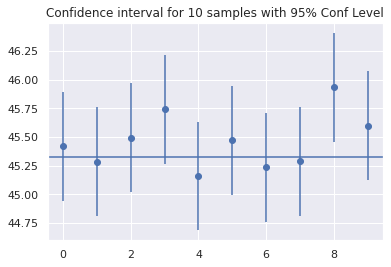

In [11]:
# plotting confidence intervals
plt.errorbar(x=np.arange(0,10,1),
            y=sample_mean,
            yerr=[(top - bot)/2 for bot, top in interval],
            fmt='o')
plt.axhline(pop_mean)
plt.title('Confidence interval for 10 samples with 95% Conf Level')

As we can see there is one interval which does not contain the true pop mean. Since interval is with confidence lever 95% that means 5% could miss the value. May be one could take more samples or increase sample size or mix of both. Good luck!

In [12]:
interval

array([[44.94355469, 45.89311198],
       [44.80922136, 45.75877864],
       [45.01822136, 45.96777864],
       [45.26622136, 46.21577864],
       [44.68655469, 45.63611198],
       [44.99755469, 45.94711198],
       [44.76255469, 45.71211198],
       [44.81388802, 45.76344531],
       [45.46055469, 46.41011198],
       [45.12322136, 46.07277864]])